In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

The dataset have 41188 rows and 21 columns / features.

In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

The dataset has no null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [8]:
outliers = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    count_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    outliers[col] = count_outliers
outliers

{'age': np.int64(469),
 'duration': np.int64(2963),
 'campaign': np.int64(2406),
 'pdays': np.int64(1515),
 'previous': np.int64(5625),
 'emp.var.rate': np.int64(0),
 'cons.price.idx': np.int64(0),
 'cons.conf.idx': np.int64(447),
 'euribor3m': np.int64(0),
 'nr.employed': np.int64(0)}

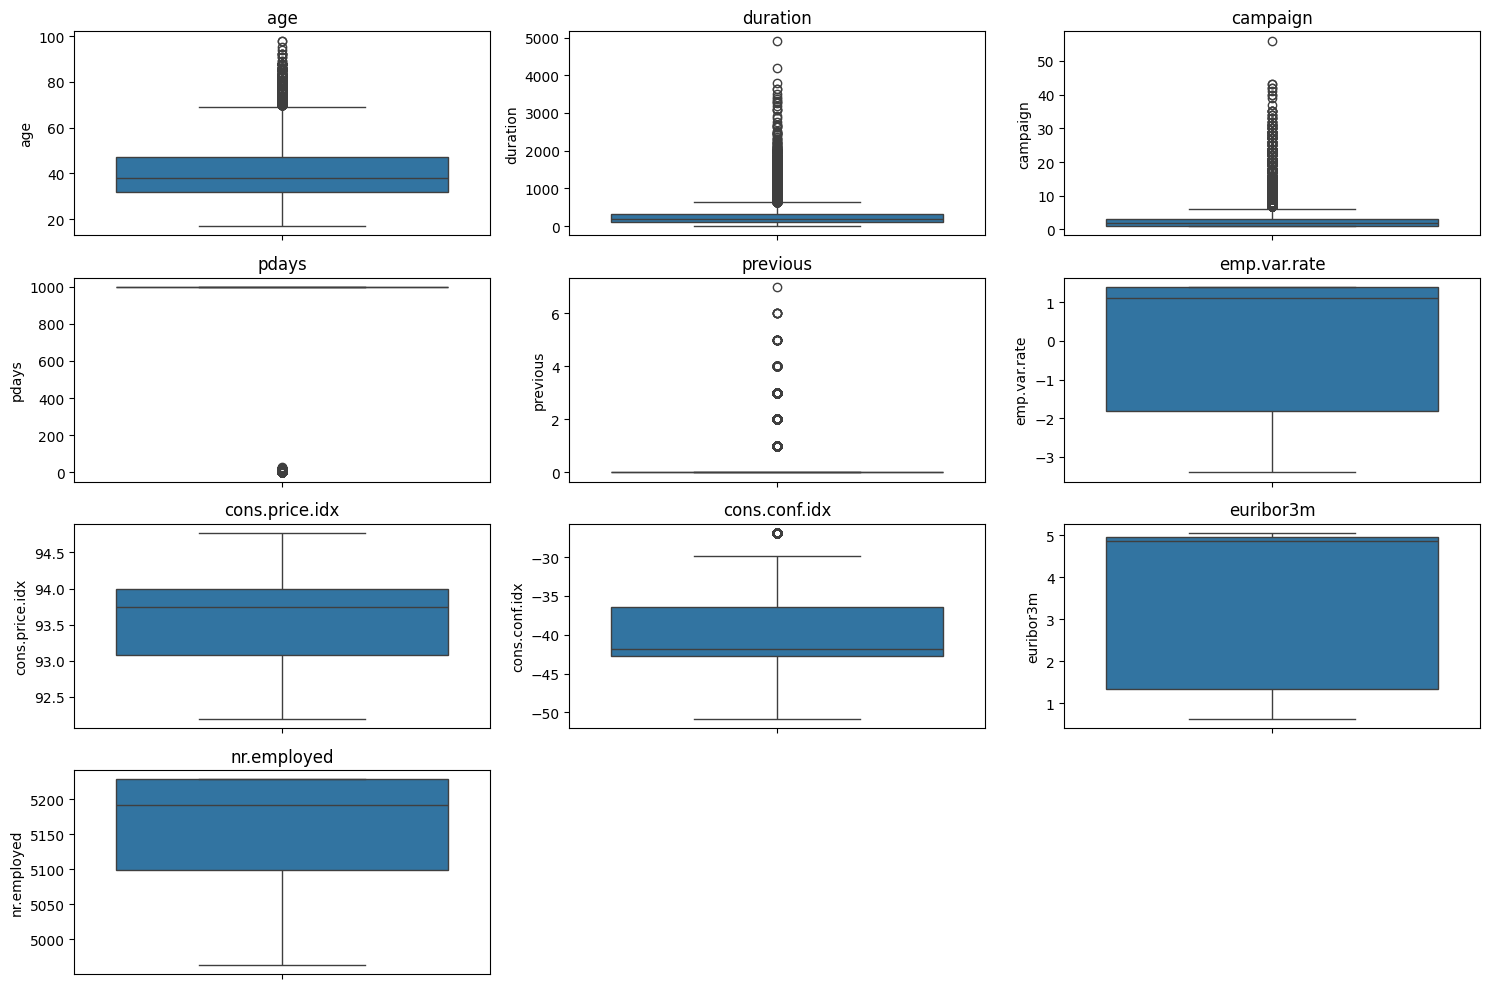

In [9]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [10]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [11]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('y')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [12]:
  for col in ['duration','campaign','previous']:
     upper = df[col].quantile(0.99)
     df[col] = np.where(df[col] > upper, upper, df[col])

In [13]:
X = df.drop('y', axis=1)
y = df['y']

In [14]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', gamma='scale', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Multi-layer Perceptron": MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
}

In [16]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    cv_scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
    results[name] = np.mean(cv_scores)
    print(f"{name}: Mean Accuracy = {np.mean(cv_scores):.4f}")

Logistic Regression: Mean Accuracy = 0.9108
Support Vector Machine: Mean Accuracy = 0.9116
Decision Tree: Mean Accuracy = 0.8873
Multi-layer Perceptron: Mean Accuracy = 0.9132


In [17]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean Accuracy'])
print("\nFinal Results:")
print(results_df)


Final Results:
                    Model  Mean Accuracy
0     Logistic Regression       0.910848
1  Support Vector Machine       0.911576
2           Decision Tree       0.887322
3  Multi-layer Perceptron       0.913154
